# Two-service model with elastic traffic

Let 's analyze the network cell with a capacity of $C$. Let users generate two types of data transfer requests. Data transfer requests are Poisson arrival with intensity $λ_i, i = 1,2$. The average length of the transmitted file is $θ_i , i =1,2$. The minimum capacity required for data transmission is $b_i, i =1,2$.

* $C$ - peak cell throughput;
* $λ_i$, $i=1,2$ - the intensity of receipt of requests for data transmission of the first/second type [requests/units.bp];
* $θ_i$, $i=1,2$ - the length/size of the transmitted file of the first/second type [bit];
* $\rho_{i}^1$, $i=1,2$ - the intensity of the proposed load created by requests for data transmission of the first/second type;
* $a_i, i=1,2$ - the share of the load created by requests for data transmission of the first/second type, which falls on a unit of bandwidth (dimensionless value);
* $b_i, i=1,2$ - the minimum requirement for network resources required for data transmission of the first/second type;
* $X_i(t), i=1,2$ - the number of requests for data transfer of the first/second type served in the system at time t , t ≥ 0 ;
* $X(t)=(X_1(t),(X_2(t))$ - Stochastic Process describing the functioning of the system at time t , t ≥ 0 ;
* $X$ is the state space of the system;
* $n_i, i=1,2$ - the number of data blocks of the first/second type transmitted in the system;
* $B_i, i=1,2$ - a set of blocking requests for data transfer of the first/second type;
* $S_i, i=1,2$ - the set of receiving requests for data transmission of the first/second type.

Model diagram (Fig. 11.1):

![Alt text](image.png)

Figure. 11.1. Scheme of a two-service model with elastic traffic

The system state space (Fig. 11.2):
\begin{equation}
\tag{11.1}
X=\{(n_1,n_2):n_1 \geq0,n_2 \geq 0\}
\end{equation}

Consider some central state $(n_1,n_2), (n_1,n_2) \in X$ . Let's construct a diagram of transition intensities for the central state (Fig. 11.3):

![Alt text](image-1.png)

Figure.11.3. Diagram of transition intensities for the central state of a two-service model with elastic traffic




Explanations:
- $\frac{C}{n_1+n_2}$ -the data transfer rate of the first/second type in the state $(n_1,n_2)$;

- $\frac{\theta_1}{\frac{C}{n_1+n_2}} = \frac{\theta_1}{C} (n_1+n_2)$ -the average service time of a data transfer request of the first type in the state $(n_1,n_2)$;

- $\frac{\theta_2}{\frac{C}{n_1+n_2}} = \frac{\theta_2}{C} (n_1+n_2)$ - the average service time of a data transfer request of the second type in the state $(n_1,n_2)$;

- $\frac{C}{\theta_1 (n_1+n_2)}$ - the intensity of the service request for the transmission of data of the first type in the state $(n_1,n_2)$;

- $\frac{C}{\theta_2 (n_1+n_2)}$ - the intensity of the service request for the transfer of data of the second type in the state $(n_1,n_2)$.

**Set of blocking of data transfer requests:**
\begin{equation}
\tag{11.2}
B_i=\{\emptyset\}, i=1,2
\end{equation}
**The set of receiving data transfer requests:**
\begin{equation}
\tag{11.3}
S_i=\bar B_i=X\backslash B_i={0,1,2,...}, i=1,2.
\end{equation}
**System of global balance equations (СУГБ):**
\begin{equation}
\tag{11.4}
\left(\lambda_1+\lambda_2+ \frac{C}{(n_1+n_2) \theta_1}n_1+\frac{C}{(n_1+n_2)\theta_2}n_2\right).p(n_1,n_2) = \lambda_1p (n_1-1,n_2).U(n_1) + \lambda_2p (n_1,n_2-1).U(n_2) + \frac{C}{(n_1+1+n_2)\theta_1} (n_1+1)p(n_1+1,n_2) + \frac{C}{(n_1+n_2+1)\theta_2}(n_2+1)p(n_1,n_2+1), (n_1,n_2)\in X.
\end{equation}

To write out a system of partial balance equations (SUGB), check the criterion Kolmogorov. Consider an arbitrary closed contour (Fig. 11.4)
![Alt text](image-2.png)
Figure 11.4. Arbitrary closed loop for a two-service model with elastic traffic


Consider the product of transition intensities:
- clockwise: $\frac{n_2}{n_1+n_2}\frac{C}{\theta_2}\frac{n_1}{n_1+n_2-1}\frac{C}{\theta_1}\lambda_1\lambda_2$
- counterclockwise: $\frac{n_1}{n_1+n_2}\frac{C}{\theta_1}\frac{n_2}{n_1+n_2-1}\frac{C}{\theta_2}\lambda_1\lambda_2$

The works are equal. The criterion is fulfilled, therefore,random process $\left(X_1(t),X_2(t)\right)$, describing the behavior of the system is a reversible Markov process, СУЧБ exists.

СУЧБ:
\begin{equation}
\tag{11.5}
\begin{cases}
p(n_1,n_2)\frac{C}{(n_1+n_2)\theta_1}n_1 = \lambda_1p(n_1-1,n_2),n_1>0, \\
p(n_1,n_2)\frac{C}{(n_1+n_2)\theta_2}n_2 = \lambda_1p(n_1,n_2-1),n_2>0, (n_1,n_2) \in X.
\end{cases}
\end{equation}

Обозначим
$\rho_i=\lambda_i\theta_i, a_1=\frac{\rho_i}{C}, \rho_i<C, i=1,2$


**Stationary probability distribution of system states:**
\begin{equation}
p(n_1,n_2)=\frac{a_1^{n_1}}{n_1!}\frac{a_2^{n_2}}{n_2!}(n_1+n_2)!p(0,0),
\end{equation}

где:
\begin{equation}
\tag{11.7}
p(0,0)=\sum_{(n_1,n_2)\in X}{(n_1+n_2)!}\frac{a_1^{n_1}}{n_1!}\frac{a_2^{n_2}}{n_2!}
\end{equation}

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem system setup

In [2]:
C = 20 # computing unit
lambda1 = 20 # request type-1 arrival intensity [requests/second] unit
theta1 = 8 # type-1 data file size or length [bits]
theta2 = 12 # type-2 data file size or length [bits]
lambda2 = 15 # request of type-2 arrival intensity [requests/second] unit
rho1 = theta1*lambda1
rho2 = theta2*lambda2
a1 = rho1/C
a2 = rho2/C

In [3]:
def p_00():
    sum_n1n2 = 0.0
    for n1 in np.arange(C+1):
        for n2 in np.arange(C+1):
            sum_n1n2 += math.factorial(n1+n2) * (math.pow(a1, n1) / math.factorial(n1))* (math.pow(a2, n2) / math.factorial(n2))
    return 1.0 / sum_n1n2
p00 = p_00()
def p_(n1, n2):
    p = 0
    if n1 == 0 and n2 == 0:
        p = p00
    else:
        p = (math.pow(a1, n1) / math.factorial(n1))*(math.pow(a2, n2) / math.factorial(n2)) * math.factorial(n1 + n2) * p00
    return p

In [4]:
#import test

#assert (rho1 < C and rho2 < C)

#assert p_00() == p_(0, 0)

In [12]:
# print probability that central state is at origine (0, 0)
print("system state is origine: p00 = ", p00)

system state is origine: p00 =  4.582962166224377e-49


In [6]:
# print all possible value of p_(n1, n2) in this system
p_n1n2_array = []
print("Распределение вероятностей для каждого состоянии [", end=None)
for n1 in np.arange(C+1):
    for n2 in np.arange(C+1):
        p = p_(n1, n2)
        print("({}, {}) : {}".format(n1, n2, p))
        p_n1n2_array.append(p)
print("]")
print("Сумма всех вероятностей p_(n1, n2) = ", sum(p_n1n2_array))

Распределение вероятностей для каждого состоянии [
(0, 0) : 4.582962166224377e-49
(0, 1) : 4.124665949601939e-48
(0, 2) : 3.7121993546417454e-47
(0, 3) : 3.3409794191775706e-46
(0, 4) : 3.006881477259814e-45
(0, 5) : 2.7061933295338323e-44
(0, 6) : 2.435573996580449e-43
(0, 7) : 2.1920165969224042e-42
(0, 8) : 1.9728149372301639e-41
(0, 9) : 1.7755334435071476e-40
(0, 10) : 1.5979800991564327e-39
(0, 11) : 1.4381820892407894e-38
(0, 12) : 1.2943638803167105e-37
(0, 13) : 1.1649274922850394e-36
(0, 14) : 1.0484347430565354e-35
(0, 15) : 9.435912687508819e-35
(0, 16) : 8.492321418757938e-34
(0, 17) : 7.643089276882142e-33
(0, 18) : 6.878780349193929e-32
(0, 19) : 6.190902314274536e-31
(0, 20) : 5.5718120828470824e-30
(1, 0) : 3.6663697329795015e-48
(1, 1) : 6.599465519363103e-47
(1, 2) : 8.909278451140188e-46
(1, 3) : 1.0691134141368226e-44
(1, 4) : 1.2027525909039255e-43
(1, 5) : 1.2989727981762396e-42
(1, 6) : 1.3639214380850516e-41
(1, 7) : 1.4028906220303387e-40
(1, 8) : 1.4204267548

In [7]:
mean_N1 = lambda1 * theta1 / (lambda1*theta1+lambda2*theta2)
mean_N2 = lambda2 * theta2 / (lambda1*theta1+lambda2*theta2)

print("Среднее число обслуживаемых запросов 1-ог типа $N_1$: ", mean_N1)
print("average number of request type 1: ", mean_N2)

Среднее число обслуживаемых запросов 1-ог типа $N_1$:  0.47058823529411764
average number of request type 1:  0.5294117647058824


In [8]:
mean_T1 = mean_N1 / lambda1
mean_T2 = mean_N2 / lambda2

print("average number of time for request type1 = ", mean_T1)
print("average number of time for request type2 = ", mean_T2)

average number of time for request type1 =  0.023529411764705882
average number of time for request type2 =  0.03529411764705882


In [9]:
# plot 
#lambda1 = 9 # request type-1 arrival intensity [requests/second] unit
#theta1 = 4 # type-1 data file size or length [bits]
#theta2 = 3 # type-2 data file size or length [bits]
#lambda2 = 6 # request of type-2 arrival intensity [requests/second] unit
#rho1 = theta1*lambda1
#rho2 = theta2*lambda2
#a1 = rho1/C
#a2 = rho2/C
lam2_array = [lam for lam in np.arange(1, lambda1 +1)]
#lam1_array = [lam for lam in np.arange(1, math.floor(C/theta1) +1)]
# lam2_array = [lam for lam in np.arange(1, math.floor(C/theta2) +1)]

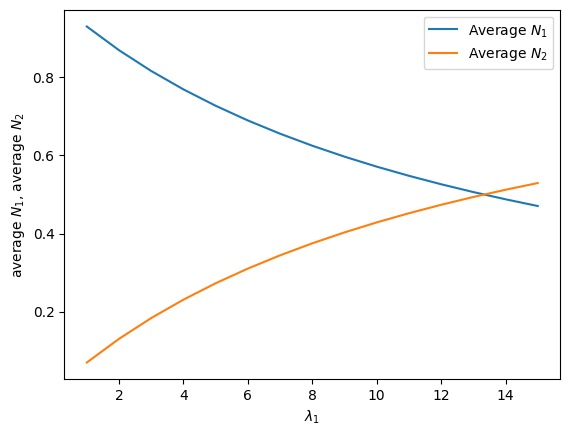

In [10]:
lam2_array = [lam for lam in np.arange(1, lambda2 +1)]
# To plot the service time type 1 vs its lamba1, let set lamba2 be constant
T1_array = []
N1_array = []
T2_array = []
N2_array = []
# lambda2 = 6
for lambda2 in lam2_array:
    N1 = lambda1 * theta1 / (lambda1*theta1 + lambda2*theta2)
    N2 = lambda2 * theta2 / (lambda1 * theta1 + lambda2 * theta2)
    N1_array.append(N1)
    N2_array.append(N2)
    T1 = N1 / lambda1
    T2 = N2 / lambda2
    T1_array.append(T1)
    T2_array.append(T2)

plt.plot(lam2_array, N1_array, label="Average $N_1$")
plt.plot(lam2_array, N2_array, label="Average $N_2$")
plt.xlabel("$\lambda_1$")
plt.ylabel("average $N_1$, average $N_2$")
plt.legend()
plt.show()

In [11]:
# To plot the service time type 1 vs its lamba1, let set lamba2 be constant
T1_array = []
N1_array = []
T2_array = []
N2_array = []
# lambda2 = 6
for lambda1 in lam1_array:
    N1 = lambda1 * theta1 / (lambda1*theta1 + lambda2*theta2)
    N2 = lambda2 * theta2 / (lambda1 * theta1 + lambda2 * theta2)
    N1_array.append(N1)
    N2_array.append(N2)
    T1 = N1 / lambda1
    T2 = N2 / lambda2
    T1_array.append(T1)
    T2_array.append(T2)

plt.plot(lam1_array, N1_array, label="Average $N_1$")
plt.plot(lam1_array, N2_array, label="Average $N_2$")
plt.xlabel("$\lambda_1$")
plt.ylabel("average $N_1$, average $N_2$")
plt.legend()
plt.show()

NameError: name 'lam1_array' is not defined

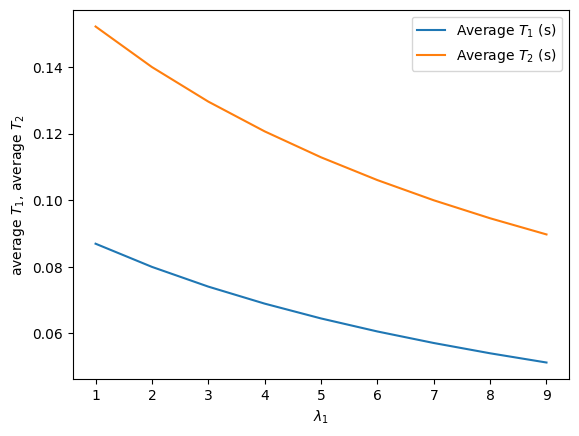

In [ ]:
plt.plot(lam1_array, T1_array, label="Average $T_1$ (s)")
plt.plot(lam1_array, T2_array, label="Average $T_2$ (s)")
plt.xlabel("$\lambda_1$")
plt.ylabel("average $T_1$, average $T_2$")
plt.legend()
plt.show()

**The main probabilistic characteristics of the model:**
- The probability of blocking in time $E_i, i = 1,2$ requests for data transmission of the first / second type
\begin{equation}
\tag{11.8}
E_1=E_2=0;
\end{equation}
- The average number of $N_i, i =1,2$ data transfer requests
of the first/second type served in the system:

\begin{equation}
\tag{11.9}
\bar N_i=\lambda_i\frac{\theta_i}{(\theta_1\lambda_1+\theta_2\lambda_2)}, i=1,2
\end{equation}

- Average time $T_i,i=1,2$ service request for data transmission of the first/second type:

\begin{equation}
\tag{11.10}
T_i=\frac{\bar N_i}{\lambda_i}
\end{equation}

**Tasks:**
1. Describe step by step the algorithm for calculating the probability distribution of the model states (the probability of blocking a request of each type, the average number of requests in the system).
2. Create a program that implements the calculation of the probability distribution, the average number of serviced requests for any values of the source data, the average time of servicing the request. The program should display:
    - the value of the probability distribution
    - the value of the average number of requests,
    - the value of the average request service time
3. Plot the dependence of the average service time of the request on the intensity of receipt of service requests.
4. Plot the dependence of the average number of serviced requests on the intensity of receipt of requests for the provision of services.
